In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

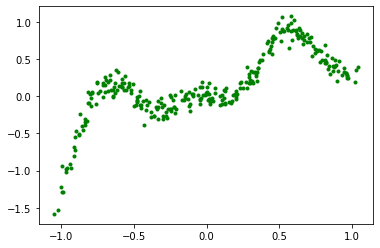

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

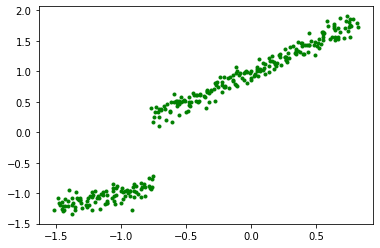

In [3]:
np.random.seed(13)
x = np.linspace(-1.5,0.8,300)
msk = x<-0.75
y = np.zeros_like(x)

# y[msk] = -0.5
# y[~msk] = 1
y[msk] = x[msk]*0.5 - 0.5
y[~msk] = x[~msk]*1 + 1

noise = np.random.normal(0,0.02, x.shape)
x = x + noise

indx = np.argsort(x)
x = x[indx]
y = y[indx]

noise = np.random.normal(0,0.1, x.shape)
y = y + noise

xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Find best split with gradient descent -- scale error around break point with gaussian

In [4]:
# optim = tnn.SGD(0.1)
# optim = tnn.Adam(0.001, 0.5, 0.999)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)

line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
# line0.weights *= 0
# line1.weights *= 0

gaussian = tnn.Gaussian()

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
#     err_scaler = 1
    
#     line0.weights *= 0
#     line1.weights *= 0
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    
    ##########11111111111
    dxl = linear.backward(dy*err_scaler)#*0.25)
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dx = dxl + dx0  + dx1
    ##########11111111111
    ##########22222222222
#     dx0 = line0.backward(dl0)
#     dx1 = line1.backward(dl1)
#     dxl = linear.backward(dy*err_scaler)
    
#     dxl = linear.backward((dx0+dx1).mean(axis=1, keepdims=True)*err_scaler)#*0.25)
    
#     dx = dxl + dx0  + dx1
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dy*err_scaler).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break


0 Error =  2.0630716050273734


100 Error =  0.21832229344425647


200 Error =  0.1012763996106861


300 Error =  0.08078461763906311


400 Error =  0.07141816023028104


500 Error =  0.06560921726347872


600 Error =  0.06262809416810493


700 Error =  0.06036254700678819


800 Error =  0.06020080472509268


900 Error =  0.05828301466774436


1000 Error =  0.05655617365327228


1100 Error =  0.0565529080848069


1200 Error =  0.05397098760234568


1300 Error =  0.05390323322530892


1400 Error =  0.05239911639917785


1500 Error =  0.051402674552046904


1600 Error =  0.05033549609969191


1700 Error =  0.0486076435744


1800 Error =  0.04771253573762443


1900 Error =  0.04594498784815716


2000 Error =  0.0437583467564182


2100 Error =  0.04345289456309466


2200 Error =  0.041214422485528084


2300 Error =  0.03883794448747551


2400 Error =  0.0375576515400193


2500 Error =  0.03727448737157854


2600 Error =  0.03238645709777137


2700 Error =  0.032020708791013576


2800 Error

TclError: invalid command name "pyimage13"

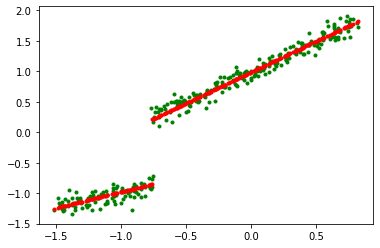

In [6]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [7]:
linear.weights, linear.bias

(array([[6.39952473]]), array([4.84536258]))

## Sigmoid based,, it has gaussian gradient scaling

In [8]:
# optim = tnn.SGD(0.1)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
linear.weights*=0

# optim = tnn.Adam(0.01)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

sigmoid = tnn.Sigmoid()

In [9]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    
#     line0.weights *= 0
#     line1.weights *= 0

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
#     dys = y0*dy + y1*dy
    dys = dy
    
    dyl = sigmoid.backward(dys)
    dxl = linear.backward(dyl)#/0.25)
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dx = dxl + dx0  + dx1
#     ##########22222222222
#     dx0 = line0.backward(dl0)
#     dx1 = line1.backward(dl1)
#     dxl = linear.backward(sigmoid.backward((dx0+dx1).mean(axis=1, keepdims=True)*err_scaler))
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, dyl.reshape(-1), color='c', marker='.')
        
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.2111264788413785


100 Error =  0.15749945163670726


200 Error =  0.07373540100511444


300 Error =  0.06787021847308633


400 Error =  0.06786036764439657


500 Error =  0.06652931673557691


600 Error =  0.06652078237171848


700 Error =  0.06362947305356371


800 Error =  0.06229624428689973


900 Error =  0.05892472235567631


1000 Error =  0.05702228844682453


1100 Error =  0.05327287776337902


1200 Error =  0.05076518370044726


1300 Error =  0.046650767084616296


1400 Error =  0.04092958998852945


1500 Error =  0.03854998892982083


1600 Error =  0.03475646278061319


1700 Error =  0.03185755606896994


1800 Error =  0.031856044949174024


1900 Error =  0.026305956132697268


2000 Error =  0.026290488875705512


2100 Error =  0.022662079542318445


2200 Error =  0.022672052136921885


2300 Error =  0.0280491123057056


2400 Error =  0.0279803228319327


2500 Error =  0.02397657372695408


2600 Error =  0.02397284980056573


2700 Error =  0.02004401932164265


2

TclError: invalid command name "pyimage27"

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')
plt.show()
print(error)

In [10]:
linear.weights, linear.bias

(array([[3.39347003]]), array([2.54610153]))

## DTR Hard diff

In [11]:
optimizer = tnn.Adam()
prob = tnn.LinearLayer(1,1,optimizer=optimizer)
linear0 = tnn.LinearLayer(1,1, optimizer=optimizer)
linear1 = tnn.LinearLayer(1,1, optimizer=optimizer)

bias = tnn.BiasLayer(1, optimizer=optimizer)
# gaussian = tnn.Gaussian()

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    pout = prob.forward(xx)
    ## Using this makes the function continuous
    ## Breaking this makes it discontinuous
#     linear0.bias*=0.
#     linear1.bias*=0.
##     bias.bias *= 0

#     linear0.weights *=0.
#     linear1.weights *=0.
    
    l0 = linear0.forward(pout)
    l1 = linear1.forward(pout)
    
    mask0 = pout>0
    mask1 = ~mask0    

    y0 = l0*mask0
    y1 = l1*mask1
    
    yout_ = y0 + y1
    yout = bias.forward(yout_)
    
    dy = yout - yy
    
    dy_ = bias.backward(dy)
    dy0 = dy_
    dy1 = dy_
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dpout0 = linear0.backward(dl0)
    dpout1 = linear1.backward(dl1)
    
#     dpout_ = dy0*l0*mask0 + dy1*l1*mask1
    
    dpout = dpout0 + dpout1
#     dpout = dy
    dx = prob.backward(dpout)#*gaussian.forward(pout))
    
    prob.update()
    linear0.update()
    linear1.update()
    bias.update()

    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, dpout.reshape(-1), color='c', marker='.')
        
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.9349014793861333


100 Error =  0.06846403976327436


200 Error =  0.06495205624966272


300 Error =  0.06416889141739476


400 Error =  0.06413266868016021


500 Error =  0.06413108741159182


600 Error =  0.06413105017679713


700 Error =  0.06413104974361439


800 Error =  0.0641310497412621


900 Error =  0.06413104974125676


TclError: invalid command name "pyimage37"

## Gaussian, decision boundary, continued regression

In [13]:
# optim = tnn.SGD(0.1)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)

# optim = tnn.Adam(0.01)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
# line0.weights *= 0
# line1.weights *= 0

gaussian = tnn.Gaussian()

In [14]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
#     err_scaler = 1
    
#     line0.weights *= 0
#     line1.weights *= 0
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(lout)
    l1 = line1.forward(lout)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dlout0 = line0.backward(dl0)
    dlout1 = line1.backward(dl1)
    dlout = dlout0 + dlout1
    
    dxl = linear.backward(dlout*err_scaler)#*0.25)
    dx = dxl + dx0  + dx1
    
    linear.update()
    line0.update()
    line1.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dy*err_scaler).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break


0 Error =  0.8751965626307342


100 Error =  0.07875438467519459


200 Error =  0.06342058447464857


300 Error =  0.0671497590082848


400 Error =  0.06316239466269129


500 Error =  0.06260137265931315


600 Error =  0.06104673935227665


700 Error =  0.05759463112647955


800 Error =  0.05377811723932852


900 Error =  0.04992652840485514


1000 Error =  0.04804700571434308


1100 Error =  0.045315150639010815


1200 Error =  0.04298771901572924


1300 Error =  0.040724764127303775


1400 Error =  0.03820169508245339


1500 Error =  0.03401766108474895


1600 Error =  0.028406997966816925


1700 Error =  0.02445393443968299


1800 Error =  0.01723146142843672


1900 Error =  0.016915366801158408


2000 Error =  0.01691285205655322


2100 Error =  0.01691318310161085


2200 Error =  0.01691266808626969


2300 Error =  0.01691222727589473


2400 Error =  0.016912316147648227


2500 Error =  0.016913188105483375


2600 Error =  0.016911836312664453


2700 Error =  0.016911759854147827


TclError: invalid command name "pyimage49"

### Sigmoid decision boundary scaling

In [15]:
# optim = tnn.SGD(0.1)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)

line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

sigmoid = tnn.Sigmoid()

In [16]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    pout = sigmoid.forward(lout)
#     err_scaler = 1
    
#     line0.weights *= 0
#     line1.weights *= 0
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(lout)
    l1 = line1.forward(lout)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dlout0 = line0.backward(dl0)
    dlout1 = line1.backward(dl1)
    dlout = dlout0 + dlout1
    
    dpout = sigmoid.backward(dlout)
    dxl = linear.backward(dpout)
    
    linear.update()
    line0.update()
    line1.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dpout).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.2111264788413785


100 Error =  0.0932855200831831


200 Error =  0.06606231297929553


300 Error =  0.06324419929402382


400 Error =  0.06387331028582689


500 Error =  0.06431019379719183


600 Error =  0.06431190371066231


700 Error =  0.06416477176768293


800 Error =  0.0641309120406869


900 Error =  0.06408179816381503


1000 Error =  0.06397359251869872


1100 Error =  0.06364590205140755


1200 Error =  0.06308805900266667


1300 Error =  0.06288284823835007


1400 Error =  0.06212351996704347


1500 Error =  0.060361159930168044


1600 Error =  0.057548268845029


1700 Error =  0.05543850140255909


1800 Error =  0.053547725156699914


1900 Error =  0.04991259513401701


2000 Error =  0.04989076163296735


2100 Error =  0.04715025072002988


2200 Error =  0.04529425639199081


2300 Error =  0.042985989579896015


2400 Error =  0.04298531729749545


2500 Error =  0.04065052669184459


2600 Error =  0.03819857560237609


2700 Error =  0.034038974395039084


2800 

TclError: invalid command name "pyimage62"

In [74]:
linear.weights

array([[-5.81297574]])